# Feedback Control
### Feedback Control System Basics:
#### 1. System Representation
In control theory, system are often representated using **transfer functions**. A transfer function G(s) relates the Laplace transform of the output Y(s) to the Laplace transform of the input U(s).  
**Y(s) = G(s) * U(s)**
#### 2. Feedback Loop
A closed-loop system includes a feedback loop where the output is compared to the reference input, and the Error E(s) is used to adjust the system input.  
**E(s) = R(s) - Y(s)**  
The adjusted input U(s) is determined by multiplying the error by a controller transfer function C(s).  
**U(s) = C(s) * E(s)**

### Example#1: Path planning
Let's consider a simple example of path planning using a propertional-integral-derivative (PID) controller. This can be used for controlling the position of a robot along a predefined path.

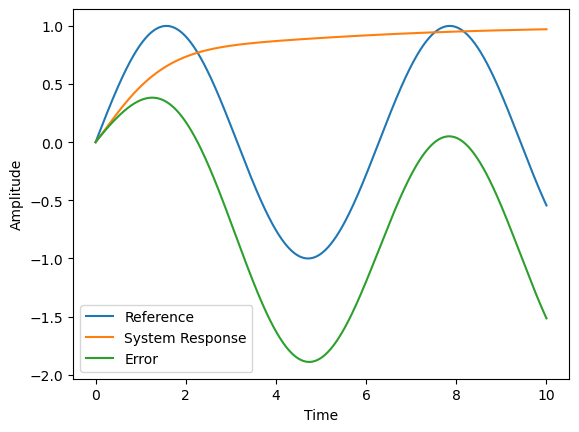

In [8]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# System dynamics (plant)
numerator = [1]
denominator = [1, 2, 1]
plant = ctrl.TransferFunction(numerator, denominator)

# PID Controller
kp = 1.5
ki = 0.5
kd = 0.5
controller = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Closed-loop system
closed_loop_system = ctrl.feedback(plant * controller)

# Time vector
time = np.linspace(0, 10, 1000)

# Reference input (desired path)
reference = np.sin(time)

# Simulate the closed-loop system response
time, response = ctrl.step_response(closed_loop_system, time)
error = reference - response

# Plot the results
plt.plot(time, reference, label='Reference')
plt.plot(time, response, label='System Response')
plt.plot(time, error, label='Error')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

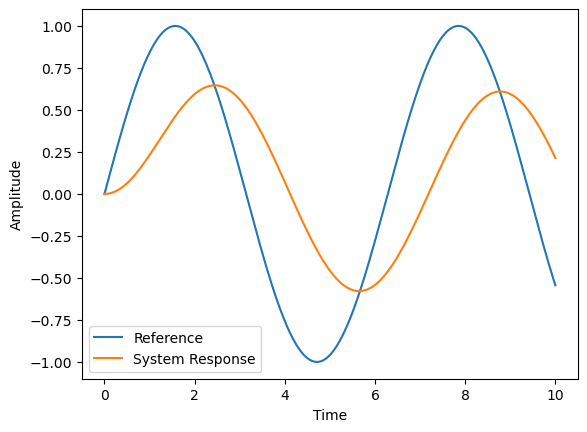

In [12]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# System dynamics (plant)
numerator = [1]
denominator = [1, 2, 1]
plant = ctrl.TransferFunction(numerator, denominator)

# PID Controller
kp = 1.5
ki = 0.5
kd = 0.5
controller = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Closed-loop system
closed_loop_system = ctrl.feedback(plant * controller)

# Time vector
time = np.linspace(0, 10, 1000)

# Reference input (desired path)
reference = np.sin(time)

# Simulate the closed-loop system response with reference input
time, response = ctrl.forced_response(closed_loop_system, time, reference)

# Plot the results
plt.plot(time, reference, label='Reference')
plt.plot(time, response, label='System Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Example#2: Longitudinal and Lateral Control

In [5]:
# For longitudinal control, you might use a speed controller (e.g., PI controller)
# For lateral control, you might use a steering controller (e.g., Stanley controller)

# Example:
# For a speed controller
speed_controller = ctrl.TransferFunction([1], [1, 0])

# For a lateral controller
steering_controller = ctrl.TransferFunction([1, 1], [1, 0])

# Combine with the vehicle dynamics and feedback to create closed-loop systems
longitudinal_system = ctrl.feedback(vehicle_dynamics * speed_controller)
lateral_system = ctrl.feedback(vehicle_dynamics * steering_controller)

NameError: name 'vehicle_dynamics' is not defined